In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
data = pd.read_csv("C:/Users/agurm/Downloads/googleplaystore")

FileNotFoundError: [Errno 2] File b'C:/Users/agurm/Downloads/googleplaystore' does not exist: b'C:/Users/agurm/Downloads/googleplaystore'

In [6]:
data = pd.read_csv('C://Users//agurm//Downloads//googleplaystore')

FileNotFoundError: [Errno 2] File b'C://Users//agurm//Downloads//googleplaystore' does not exist: b'C://Users//agurm//Downloads//googleplaystore'

In [7]:
data = pd.read_csv('C://Users//agurm//Downloads//googleplaystore')

FileNotFoundError: [Errno 2] File b'C://Users//agurm//Downloads//googleplaystore' does not exist: b'C://Users//agurm//Downloads//googleplaystore'

In [8]:
data = pd.read_csv('C:/Users/agurm/Downloads/googleplaystore')

FileNotFoundError: [Errno 2] File b'C:/Users/agurm/Downloads/googleplaystore' does not exist: b'C:/Users/agurm/Downloads/googleplaystore'

In [9]:
data = pd.read_csv('C:/Users/agurm/Downloads/googleplaystore.csv')

In [10]:
data.dropna(inplace=True)

In [11]:
def filter(per):
    if "M" in str(per) and "," in str(per):
        per = str(per).replace("M","")
        per = per.replace(",","")
        return int(per)*1000000
    elif "M" in str(per):
        per = int(str(per).replace("M",""))
        return per*1000000
    elif "," in str(per):
        per = str(per).replace(",","")
        return int(per)
    
    else:  
        return int(per)

In [12]:
data["Reviews"] =data["Reviews"].apply(filter) # all the values of column 'Reviews' are passed to filter method

In [58]:
def filter1(per):
    per = str(per)
    if "M" in per:
        per = per.replace("M","")
        return float(per)
    elif per == "Varies with device":
        return np.NaN
    elif "k" in per:
        return float(per.replace("k",""))/1000
    else:
        return float(per)

In [59]:
def filter2(per):
    per = str(per)
    if "+" in per:
        per = per.replace("+","")
    if "," in per:
        per = per.replace(",","")
        
    return int(per)


In [60]:
data["Installs"]=data["Installs"].apply(filter2)# used to apply filter2 function"


In [61]:
def filter3(per):
    per = str(per)
    if "$" in per:
        per=per.split("$")[1]
    return (float(per)*69.44)


In [62]:
import plotly
print(plotly.__version__)
%matplotlib inline


import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


4.4.1


C:\Users\agurm\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in greater

C:\Users\agurm\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in less

C:\Users\agurm\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\agurm\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



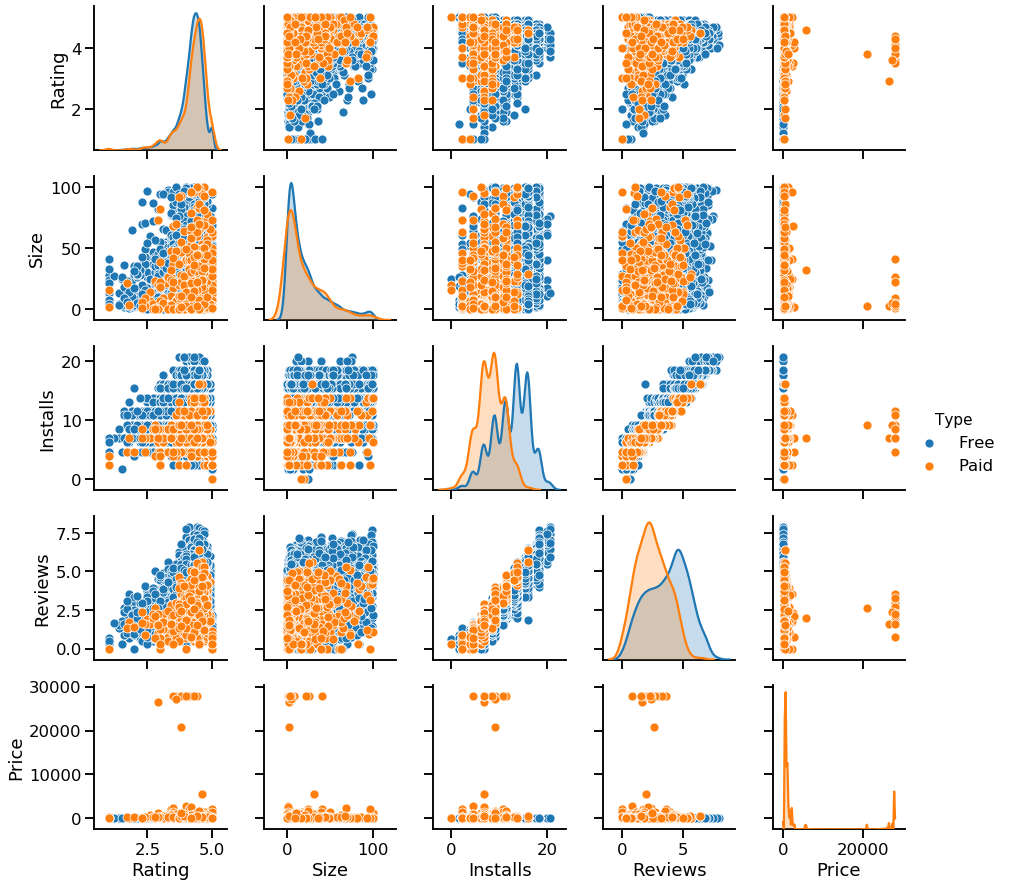

In [63]:
sns.pairplot(pd.DataFrame(list(zip(data["Rating"],data["Size"], np.log(data["Installs"]), np.log10(data["Reviews"]),data["Type"], data["Price"])), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type')

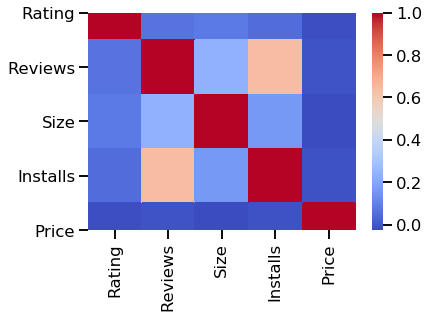

In [64]:
sns.heatmap(data.corr(),cmap='coolwarm')


In [65]:
number_of_apps_in_category = data['Category'].value_counts().sort_values(ascending=True)

df = [go.Pie(labels = number_of_apps_in_category.index,values = number_of_apps_in_category.values,hoverinfo = 'label+value')]

plotly.offline.iplot(df, filename='active_category')

In [66]:
df = [go.Histogram(
        x = data.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(data['Rating']))
plotly.offline.iplot(df, filename='overall_rating_distribution')


Average app rating =  4.191837606837612


In [67]:
#print('Junk apps priced above 350$')
data[['Category', 'App',"Price"]][data.Price > 200*64]

Category                             App       Price
4197     FAMILY          most expensive app (H)  27775.3056
4362  LIFESTYLE                      💎 I'm rich  27775.3056
4367  LIFESTYLE        I'm Rich - Trump Edition  27776.0000
5351  LIFESTYLE                       I am rich  27775.3056
5354     FAMILY                  I am Rich Plus  27775.3056
5355  LIFESTYLE                   I am rich VIP  20831.3056
5356    FINANCE               I Am Rich Premium  27775.3056
5357  LIFESTYLE             I am extremely Rich  26386.5056
5358    FINANCE                      I am Rich!  27775.3056
5359    FINANCE              I am rich(premium)  27775.3056
5362     FAMILY                   I Am Rich Pro  27775.3056
5364    FINANCE  I am rich (Most expensive app)  27775.3056
5366     FAMILY                       I Am Rich  27080.9056
5369    FINANCE                       I am Rich  27775.3056
5373    FINANCE              I AM RICH PRO PLUS  27775.3056

In [68]:
temp=pd.DataFrame(data["Content Rating"].value_counts()).reset_index()

temp.columns=['user', 'Content Rating']

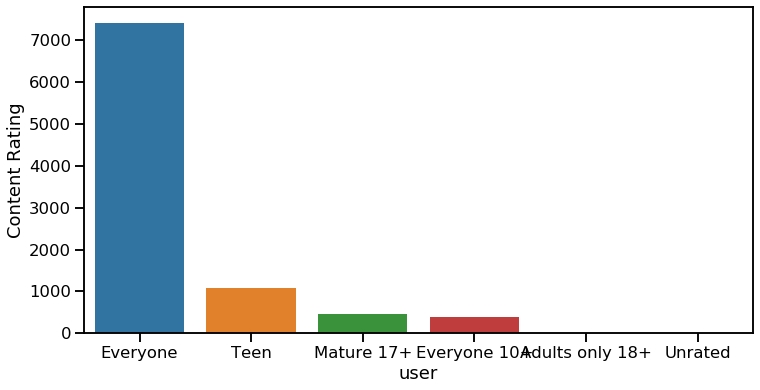

In [69]:
plt.figure(figsize=(12,6))
sns.barplot(data=temp,x="user",y="Content Rating")

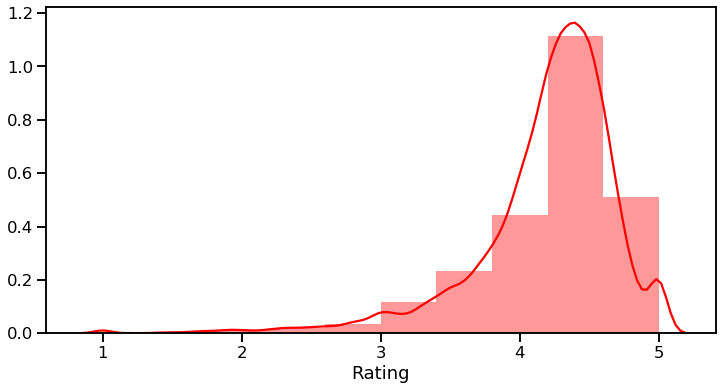

In [70]:
#most reviewed app rating
plt.figure(figsize=(12,6))
sns.distplot(data["Rating"],bins=10,color="red")


Text(0.5, 0, '')

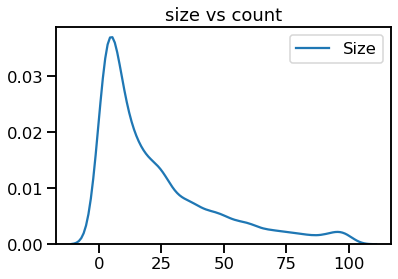

In [71]:
sns.kdeplot(data=data["Size"])
plt.title("size vs count")
plt.xlabel("")

Text(0.5, 1.0, 'avg rating table based on category')

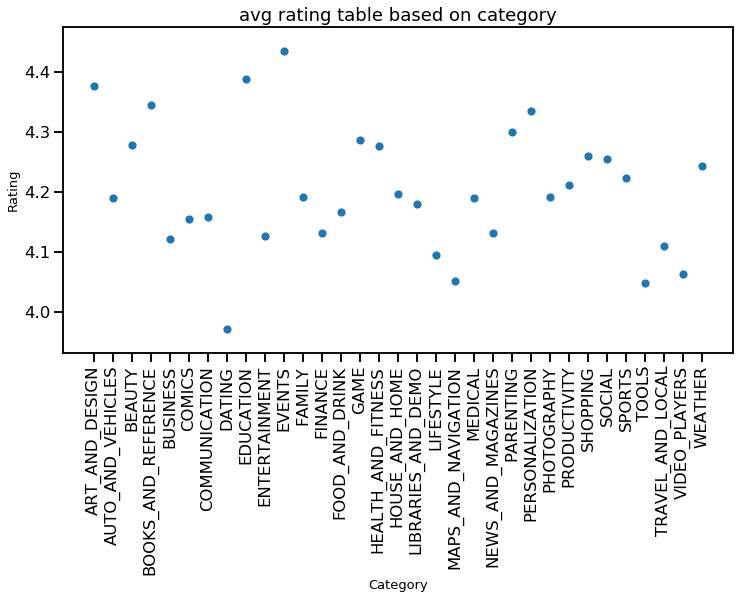

In [72]:
plt.figure(figsize=(12,6))

sns.scatterplot(x = data.groupby('Category')['Rating'].mean().index, y = data.groupby('Category')['Rating'].mean().values)
plt.xlabel('Category', fontsize=13)
plt.ylabel('Rating', fontsize=13)
plt.xticks(rotation=90)
plt.title("avg rating table based on category")

C:\Users\agurm\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

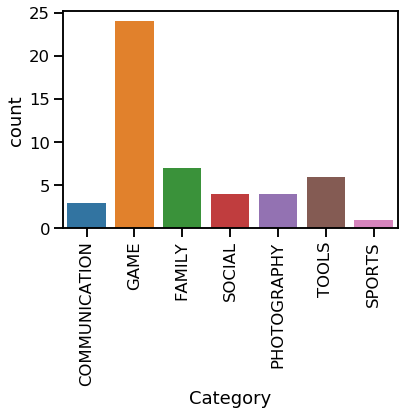

In [73]:
most_popular_apps = data[(data["Reviews"]>10000000) ][ (data["Rating"]>=4.5)]
sns.countplot(most_popular_apps["Category"])
plt.xticks(rotation=90)

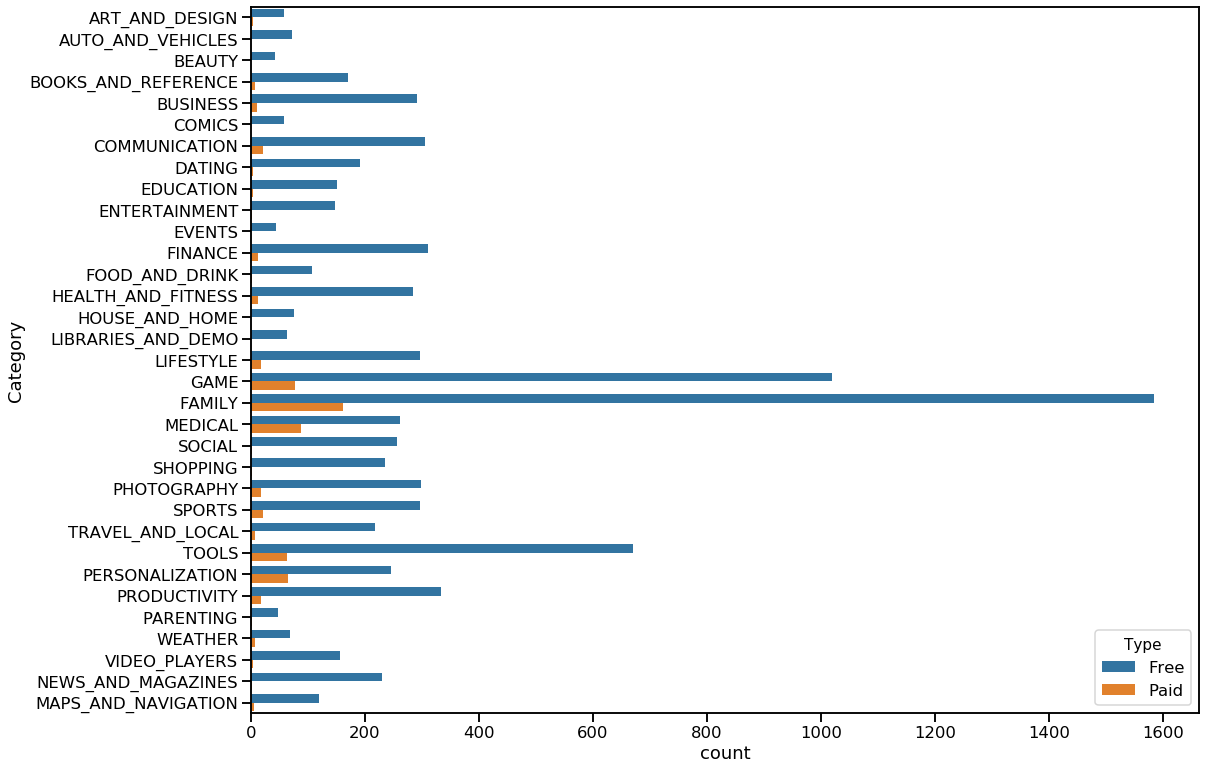

In [74]:
sns.set_context('talk',font_scale=1)
plt.figure(figsize=(17,13))
sns.countplot(data=data,y="Category",hue="Type")

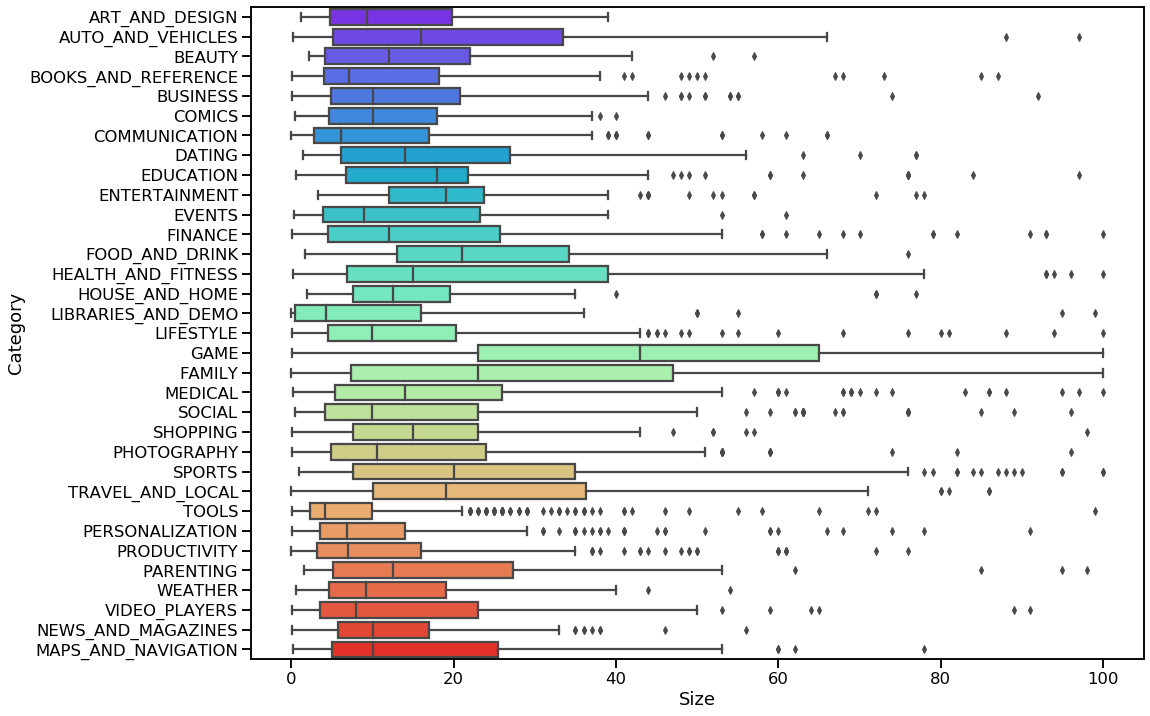

In [75]:
plt.figure(figsize=(16,12))
sns.boxplot(data=data,x="Size",y="Category",palette='rainbow')


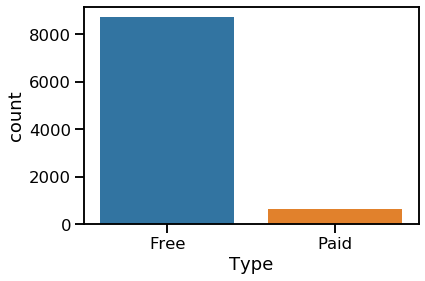

In [76]:
sns.countplot(x=data["Type"])


Text(0.5, 0, 'no of apps')

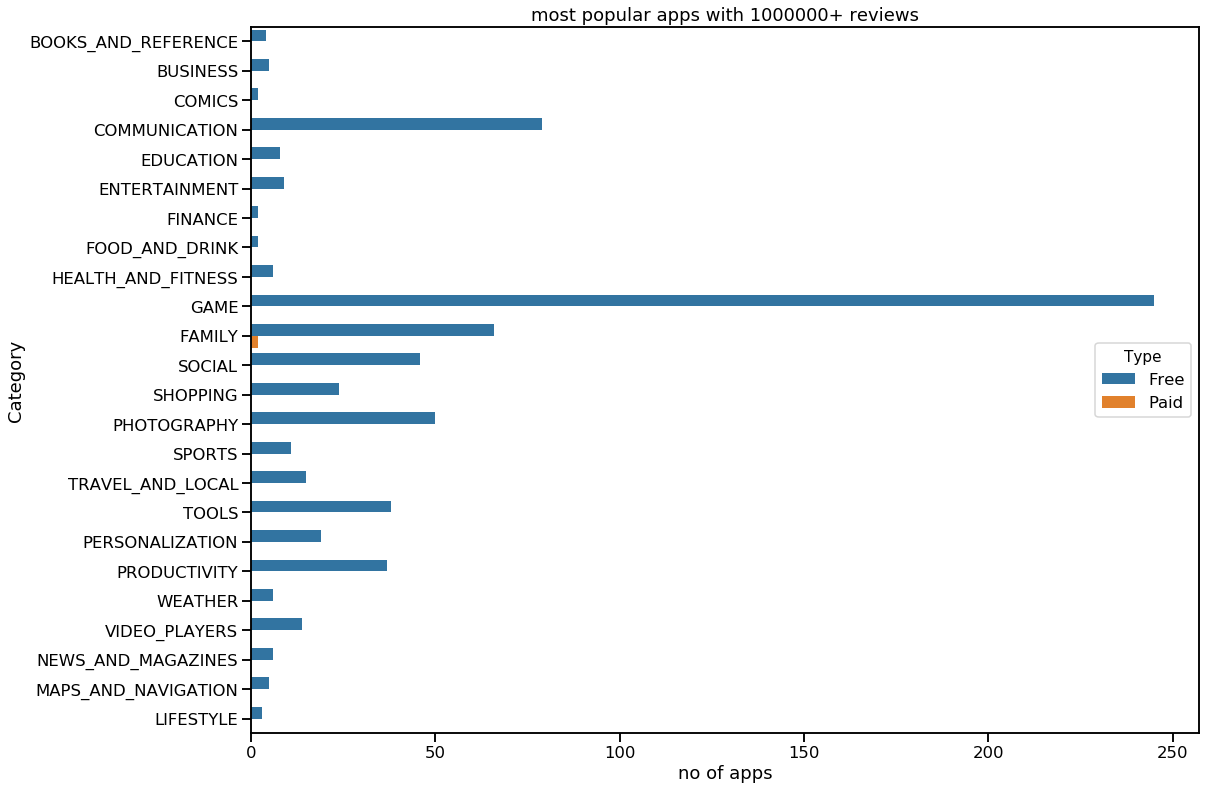

In [77]:
plt.figure(figsize=(17,13))
sns.countplot(data=data[data["Reviews"]>1000000],y="Category",hue="Type")
plt.title("most popular apps with 1000000+ reviews")
plt.xlabel("no of apps")

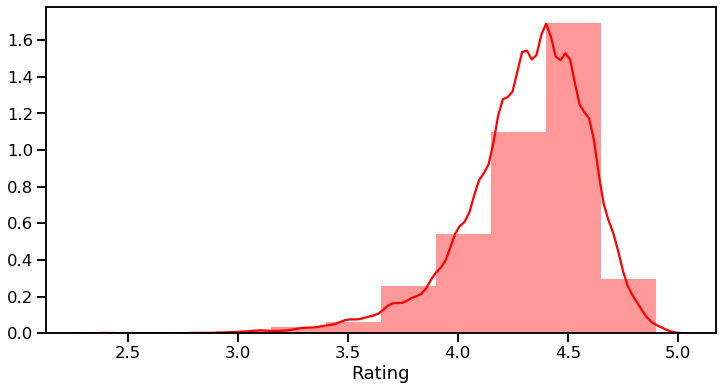

In [78]:
#most reviewed app rating
plt.figure(figsize=(12,6))
sns.distplot(data[data["Reviews"]>10000]["Rating"],bins=10,color="red")

C:\Users\agurm\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in greater

C:\Users\agurm\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in less

C:\Users\agurm\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\agurm\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



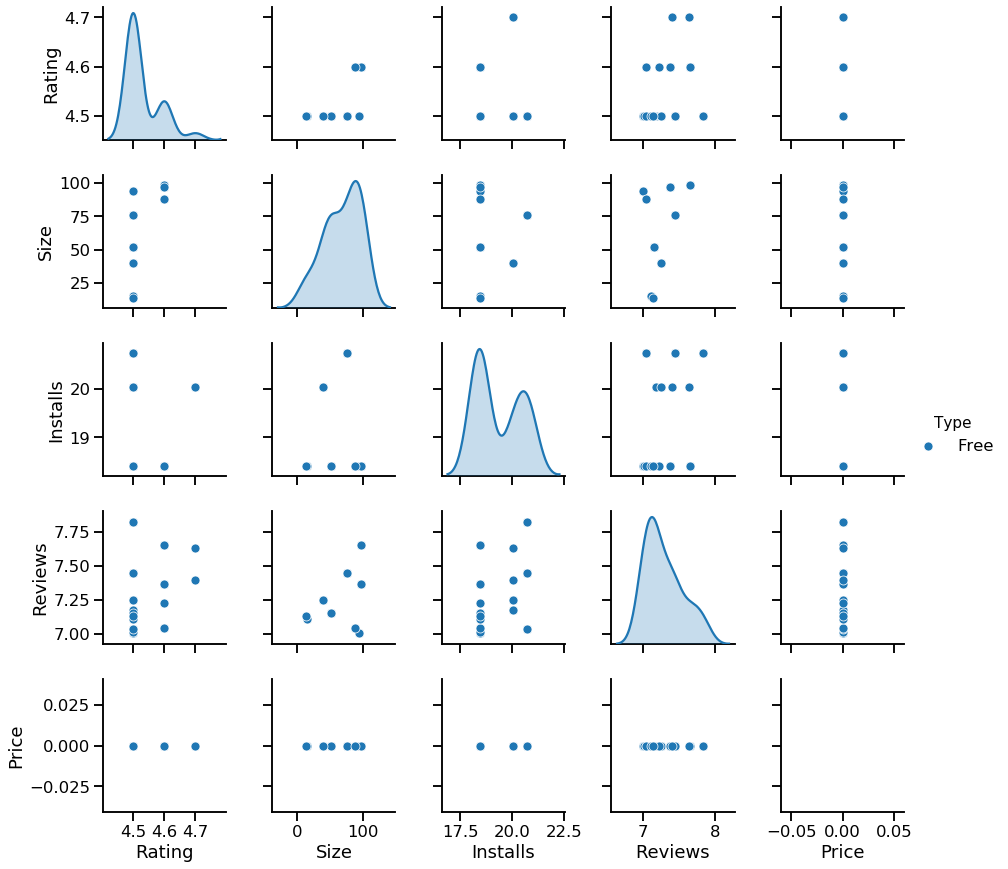

In [79]:
sns.pairplot(pd.DataFrame(list(zip(most_popular_apps["Rating"],most_popular_apps["Size"], np.log(most_popular_apps["Installs"]), np.log10(most_popular_apps["Reviews"]),most_popular_apps["Type"], most_popular_apps["Price"])), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type')


Text(0.5, 1.0, 'apps with reviews graterthan 100000')

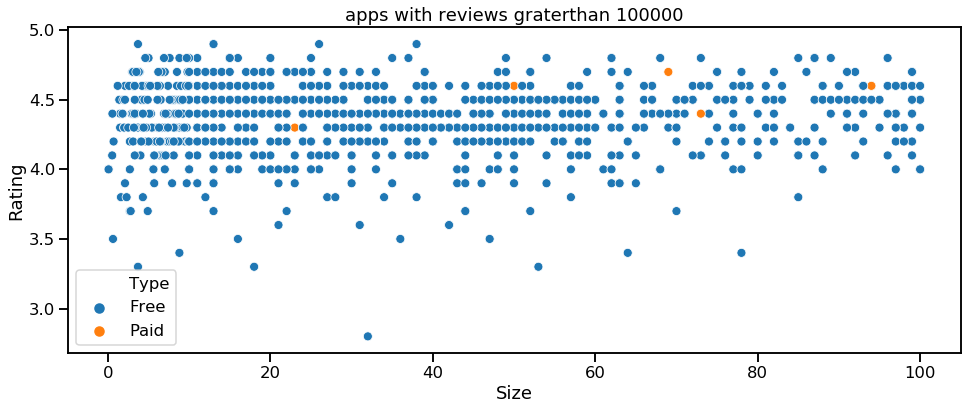

In [80]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=data[data["Reviews"]>100000],x="Size",y="Rating",hue="Type")
plt.title("apps with reviews graterthan 100000")

In [81]:
x=np.log(data["Installs"])
y=np.log(data["Reviews"])

In [82]:
popular_apps = data[(data["Installs"]>10000000) & (data["Rating"]>=4.7)]
#the most popular paid apps with decent reviews and ratings
pd.DataFrame(popular_apps[popular_apps["Type"]=="Free"][["App"]])

App
699                      Duolingo: Learn Languages Free
784                      Duolingo: Learn Languages Free
799                      Duolingo: Learn Languages Free
826                      Duolingo: Learn Languages Free
1360  Period Tracker - Period Calendar Ovulation Tra...
1677                                Bubble Witch 3 Saga
1712                                          Toy Blast
1720                                         Bowmasters
1762                                         Bowmasters
1763                                     Piano Tiles 2™
1877                                          Toy Blast
1907                                         Bowmasters
1922                                         Bowmasters
1939                      CATS: Crash Arena Turbo Stars
1999                                         Bowmasters
2056                     Duolingo: Learn Languages Free
2216                     Duolingo: Learn Languages Free
2674                                          The birth
2684           Mercado Libre: Find your favorite brands
2931                     Video Editor Music,Cut,No Crop
3112                           Booking.com Travel Deals
3156                           Booking.com Travel Deals
3211                           Booking.com Travel Deals
3298                        Brightest Flashlight Free ®
3365                                     ZenUI Launcher
3464                        Calculator - unit converter
3941                                              Bible
4005            Clean Master- Space Cleaner & Antivirus
4038  DU Recorder – Screen Recorder, Video Editor, Live
5719  Kaspersky Mobile Antivirus: AppLock & Web Secu...
6077                                         Bowmasters
7536  Security Master - Antivirus, VPN, AppLock, Boo...
8439                     Duolingo: Learn Languages Free

In [83]:
popular_apps = data[(data["Installs"]>100000) & (data["Rating"]>4.5)]
#the most popular paid apps with decent reviews and ratings
pd.DataFrame(popular_apps[popular_apps["Type"]=="Paid"][["App","Price"]])


App     Price
853                Toca Life: City  277.0656
2151               Toca Life: City  277.0656
4034                 Hitman Sniper   68.7456
4260             Cut the Rope GOLD   68.7456
5627     Five Nights at Freddy's 2  207.6256
5631       Five Nights at Freddy's  207.6256
6936                     Hitman GO   68.7456
8449     Cameringo+ Filters Camera  207.6256
8804           DraStic DS Emulator  346.5056
8860                   Bloons TD 5  207.6256
9678             Where's My Water?  138.1856
9785  ES File Explorer/Manager PRO  207.6256
9941                        Tasker  207.6256

In [84]:
mldata = data[["Reviews","Size","Installs","Price","Rating"]]
mldata.dropna(inplace=True)

X=mldata.iloc[:,0:-1].values
y = mldata.iloc[:,-1].values

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y)

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=300)


C:\Users\agurm\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
rfr.fit(xtrain,ytrain)
ypre = rfr.predict(xtest)

df=pd.DataFrame()

df["ytest"]=pd.Series(ytest)

df["ypre"] =pd.Series(ypre)
df.sample(10)

ytest      ypre
1805    3.7  4.283333
510     4.6  4.078667
1666    4.7  4.465667
798     4.6  4.320000
556     4.4  4.358667
335     4.8  4.171000
264     4.4  4.678667
1329    4.2  4.061667
633     4.5  4.517000
463     3.9  4.058000